In [1]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/pradap/downsample')

In [2]:
import py_stringsimjoin as ssj
from downsample.core.down_sample import down_sample

In [3]:
from dask.distributed import Client
from dask import threaded

In [5]:
# load data sets
A, B = ssj.load_books_dataset()

In [16]:
len(A), len(B)

(3022, 3099)

In [6]:
# execute the task using multiple threads on a single machine
sampled_tbls = down_sample(A, B, 3000, 1, num_chunks=4, scheduler=threaded.get)

[########################################] | 100% Completed |  3.4s


In [7]:
ltbl_sampled = sampled_tbls[0]
rtbl_sampled = sampled_tbls[1]

In [8]:
ltbl_sampled.head(1)

,ID,Title,Price,Author,ISBN13,Publisher,Publication_Date,Pages,Dimensions
0,BN0001,The Maze Runner Series Complete Collection,$24.21,James Dashner,9780385388894,Random House Children's Books,7/8/14,NaN,5.60(w) x 8.40(h) x 3.30(d)


In [9]:
rtbl_sampled.head(1)

,ID,Title,UsedPrice,NewPrice,Author,ISBN10,ISBN13,Publisher,Publication_Date,Pages,Dimensions
0,HC0001,The Hunger Games(Hunger Games (Quality)),$4.98,$11.02,Suzanne Collins,0439023521,9780439023528,Scholastic Press,"Jul. 3rd, 2010",374,5.30 x 8.00 x 0.90 inches


In [4]:
# execute the task using a cluster 

# specify the scheduler to which the client should connect to (currently scheduler has 64 workers to execute the tasks)
client = Client('128.110.96.88:8786')

In [27]:
# execute the task
sampled_tbls = down_sample(A, B, 3000, 1, num_chunks=10, scheduler=client.get)

Internals of down sample function

In [14]:
# dont do actual computation, just return the object that is to given to the scheduler
delayed_tbls = down_sample(A, B, 3000, 1, num_chunks=5, 
                           ret_delayed=True)

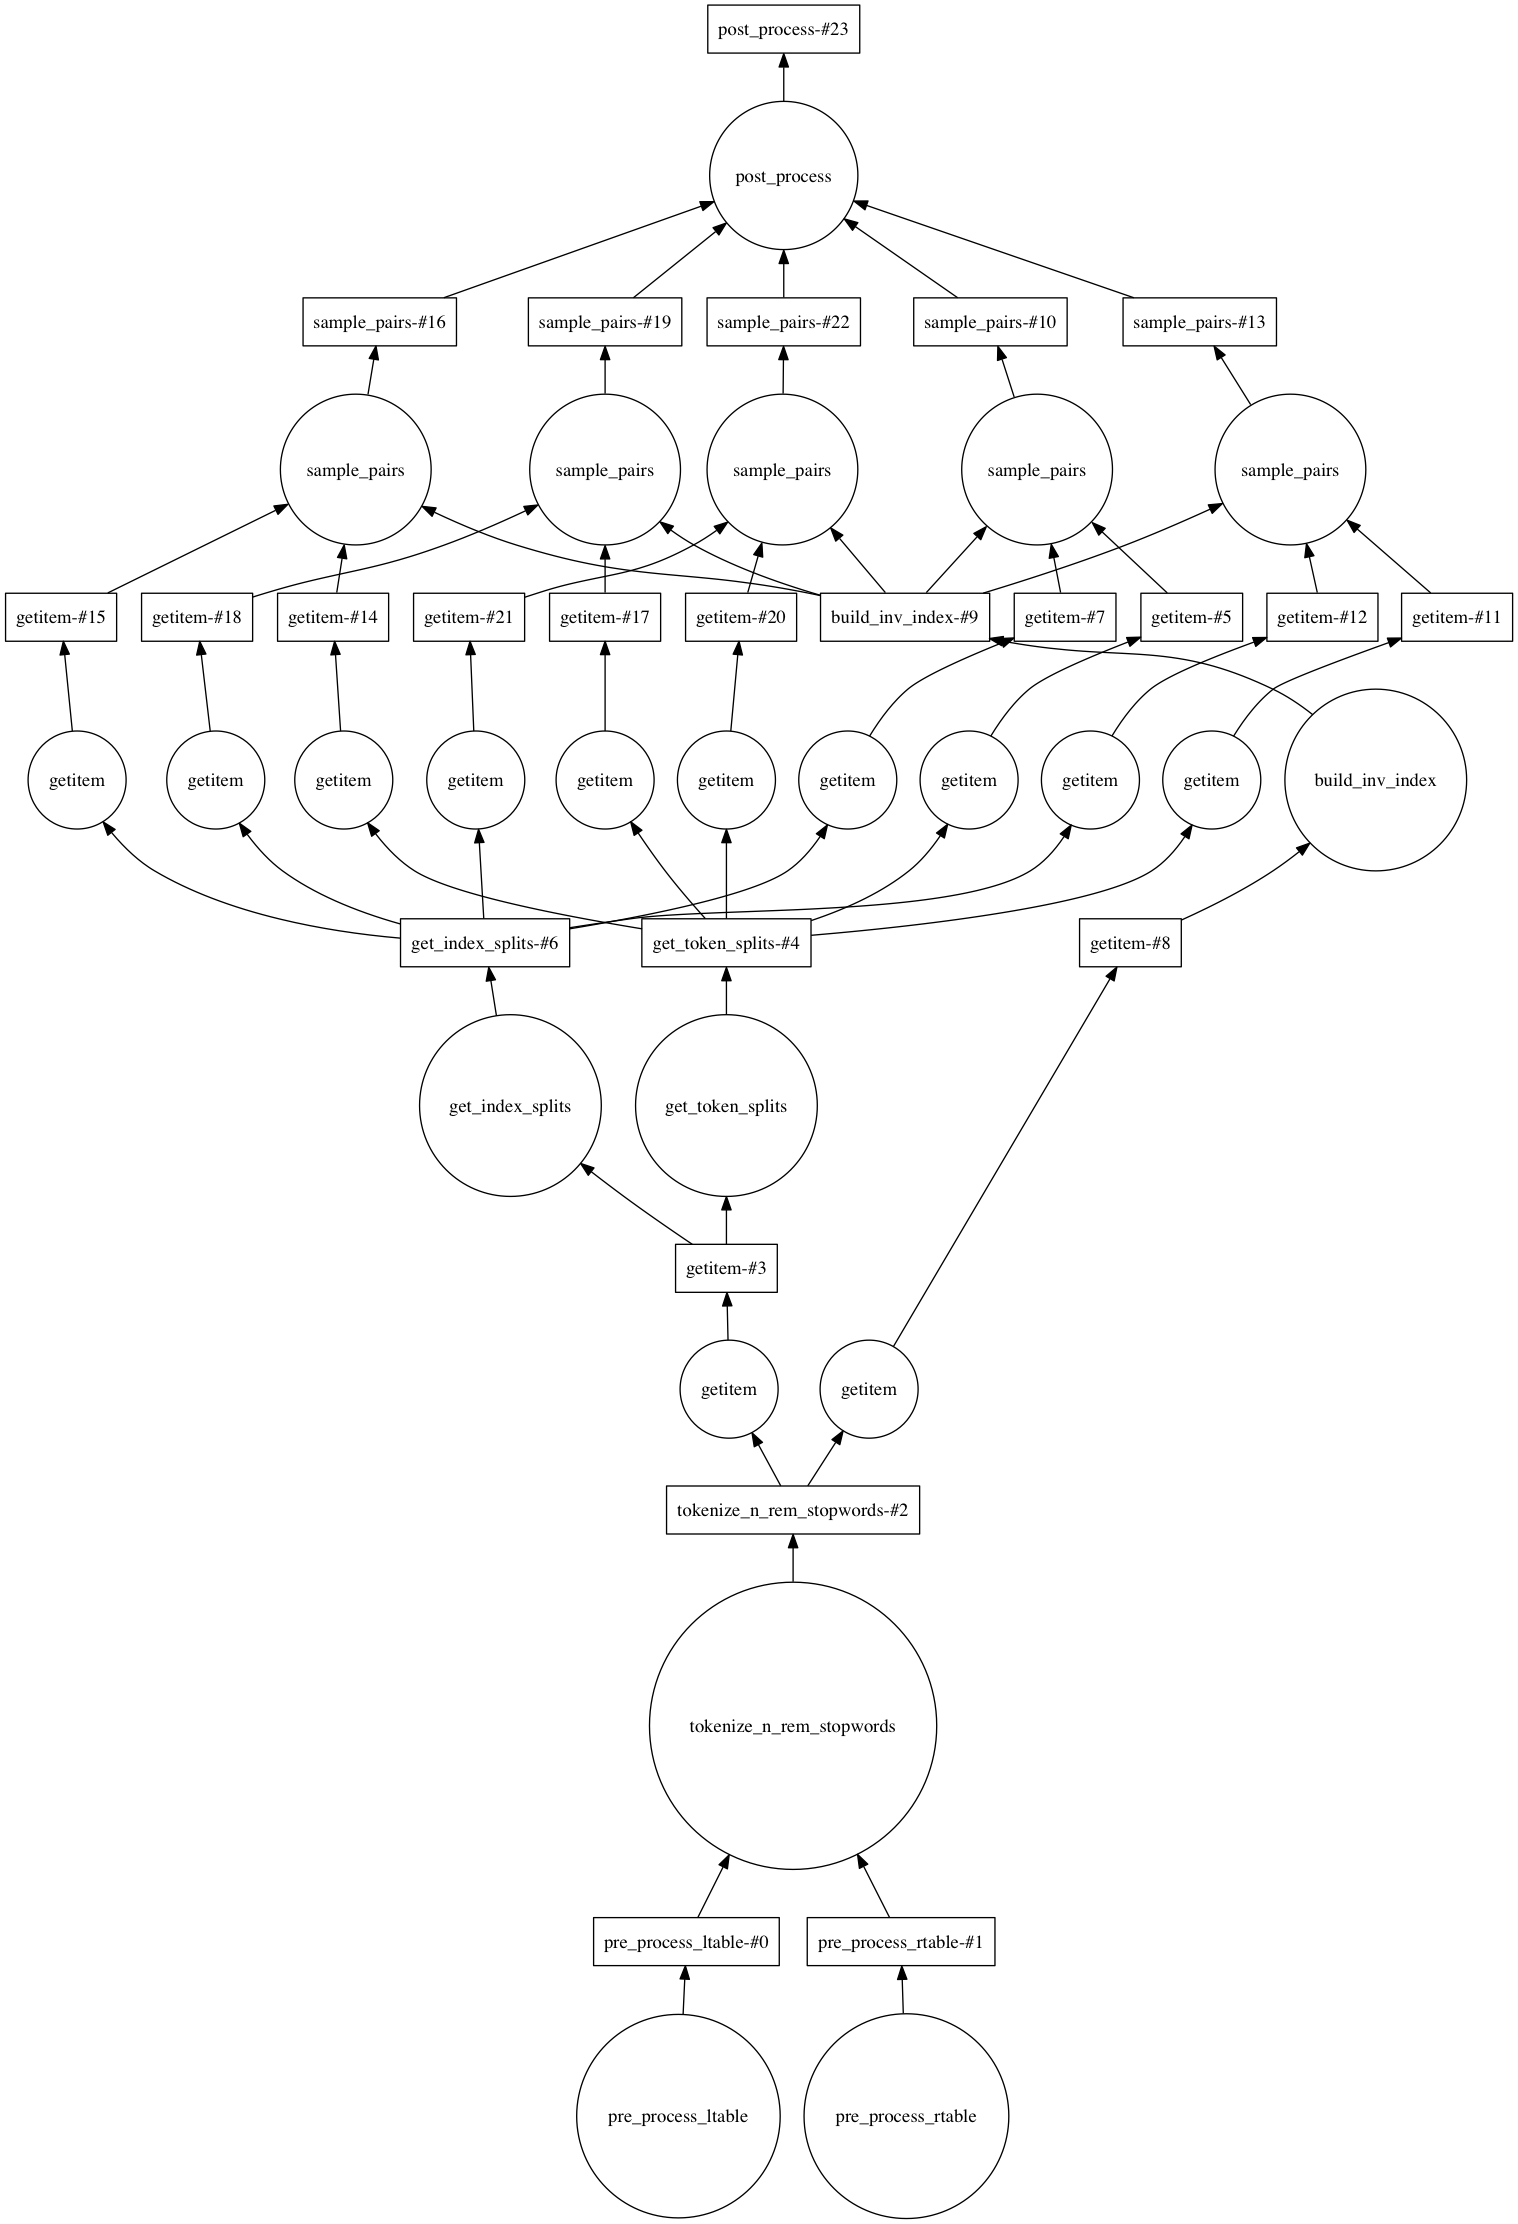

In [15]:
delayed_tbls.visualize()